In [174]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   

In [33]:
import numpy as np
import pandas as pd
import importlib
import modules
import cellpylib as cpl 
importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt

from modules import initial_to_random_walk
from modules import jam_lifespans
from modules import run_model

<module 'modules' from 'C:\\Users\\李凌峰\\complex simulation system\\01.24 update version\\modules.py'>

[5.0, 4.0]

1

In [37]:
importlib.reload(modules)
from modules import run_model

p = 0.5
L = 1000
T = int(L / 2)
n = 1
A= L*T/2 
iteration=0
delay_experience=[]
while iteration<1000:  
    lifespan_counter, jam_size_counter = run_model(p, L, T, n)
    total_delay=0 
    for item, count in jam_size_counter.items():
        total_delay=total_delay+item*count
    
    delay_experience.append(total_delay)
    iteration+=1 
    
#delay_experience 
# P_j=delay_experience/A     

<module 'modules' from 'C:\\Users\\李凌峰\\complex simulation system\\01.24 update version\\modules.py'>

TypeError: unsupported operand type(s) for /: 'list' and 'float'

### Aggreated measures 

Trangulize area: $A$

Total delay  $A_J$

Total distance travel $A_C/2 =A/2-A_J$

average density: $k_A$

average flow: $q_A$

average speed: $v_A$  

congest probability $P_J$

In [194]:
delay_experience
distance_travel=A/2 - np.array(delay_experience)
P_j= np.array(delay_experience)/A 
q_A = 1/2 - P_j 
v_A=1-2*P_j 

[11514,
 33873,
 21581,
 47182,
 15476,
 6072,
 8050,
 8482,
 49617,
 81201,
 82851,
 30902,
 59361,
 18230,
 12407,
 41221,
 16242,
 24122,
 44687,
 49321,
 3993,
 22928,
 9712,
 70028,
 14061,
 14583,
 32670,
 13909,
 53920,
 5012,
 15152,
 68449,
 26514,
 23132,
 15086,
 10132,
 39226,
 26084,
 64145,
 16109,
 33635,
 21024,
 43430,
 82406,
 16391,
 77777,
 56813,
 15582,
 50027,
 74416,
 20499,
 82579,
 18579,
 44376,
 102975,
 15599,
 63018,
 25045,
 12243,
 85784,
 9029,
 10349,
 49699,
 8127,
 8116,
 3936,
 26179,
 23672,
 95289,
 38817,
 12378,
 15957,
 38074,
 100390,
 6415,
 27303,
 29735,
 60663,
 10985,
 44107,
 5885,
 9856,
 13193,
 39189,
 101478,
 4289,
 7946,
 7148,
 15383,
 21871,
 11395,
 6345,
 27416,
 39723,
 21125,
 31593,
 22168,
 11905,
 30979,
 8686,
 35151,
 50956,
 40958,
 34212,
 21910,
 97998,
 48830,
 16031,
 81366,
 15813,
 80996,
 15345,
 29474,
 24459,
 44955,
 15427,
 29426,
 18263,
 73630,
 6954,
 43263,
 12938,
 57061,
 6007,
 33302,
 16430,
 82468,
 

Text(0.5, 1.0, 'Probability Density Function')

Text(0.5, 0, 'Total delay experience')

Text(0, 0.5, 'Density')

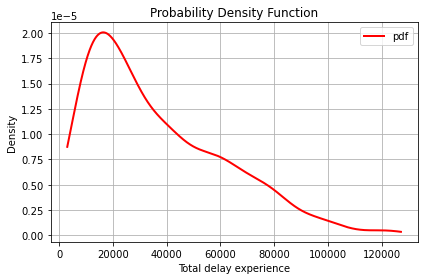

In [193]:
## distribution of total delay 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

data = np.array(delay_experience) 
density = gaussian_kde(data)
xs = np.linspace(min(data), max(data), 1000)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs, density(xs),color='red', linestyle='-', linewidth=2,label='pdf')
plt.title('Probability Density Function')
plt.xlabel('Total delay experience')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()




Text(0.5, 1.0, 'Probability Density Function')

Text(0.5, 0, 'Total distance travel')

Text(0, 0.5, 'Density')

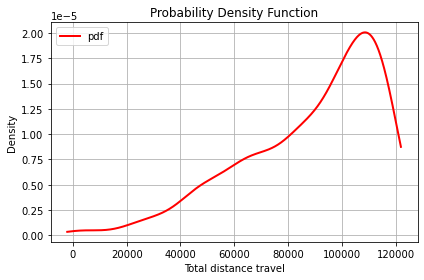

In [192]:
## distribution of total distance travel 
density = gaussian_kde(distance_travel)
xs = np.linspace(min(distance_travel), max(distance_travel), 1000)
density.covariance_factor = lambda : .25
density._compute_covariance() 
plt.plot(xs, density(xs),color='red', linestyle='-', linewidth=2,label='pdf')
plt.title('Probability Density Function')
plt.xlabel('Total distance travel')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Probability Density Function')

Text(0.5, 0, 'average flow')

Text(0, 0.5, 'Density')

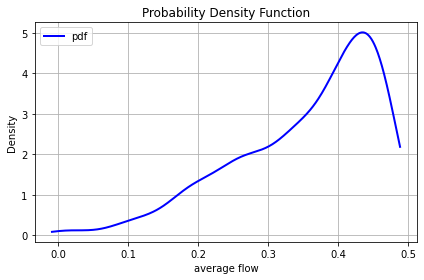

In [191]:
## distribution of average flow 
mean_flow = np.array(q_A) 
density = gaussian_kde(mean_flow)
xs = np.linspace(min(mean_flow), max(mean_flow), 500)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs, density(xs),color='blue', linestyle='-', linewidth=2,label='pdf')
plt.title('Probability Density Function')
plt.xlabel('average flow')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()

Text(0.5, 1.0, 'Probability Density Function')

Text(0.5, 0, 'average speed')

Text(0, 0.5, 'Density')

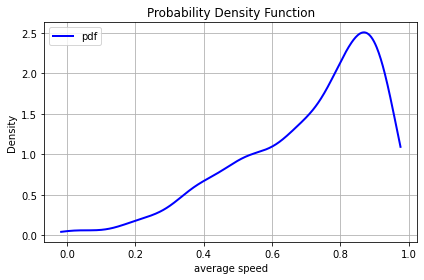

In [189]:
## distribution of average speed 
density = gaussian_kde(v_A)
xs = np.linspace(min(v_A), max(v_A), 500)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs, density(xs),color='blue', linestyle='-', linewidth=2,label='pdf')
plt.title('Probability Density Function')
plt.xlabel('average speed')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout() 
plt.show()



### ignore the following, I will modify 

<ipython-input-106-def73c6e2161>:13: RuntimeWarning: divide by zero encountered in true_divide
  coeff = np.sqrt(lambda_param / (2 * np.pi * x**3))
<ipython-input-106-def73c6e2161>:14: RuntimeWarning: divide by zero encountered in true_divide
  exp_part = np.exp(-lambda_param * ((x - mu)**2) / (2 * mu**2 * x))
<ipython-input-106-def73c6e2161>:15: RuntimeWarning: invalid value encountered in multiply
  return coeff * exp_part


<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Inverse Gaussian Distribution')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Probability Density')

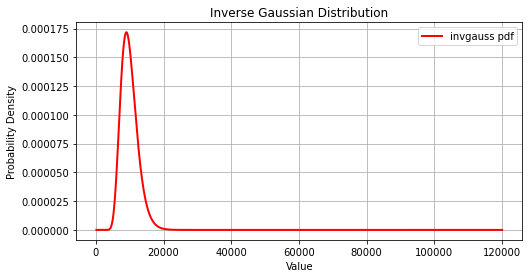

(array(0.625416), array(0.24462845))

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgauss

inv_gauss
invgauss
# 设置反高斯分布的参数
mu = 0.625416  # 均值
lambda_param = 9.8298  # 形状参数
factor=2*L**(-3/2)
# 生成数据点

x = np.linspace(0,120000,1000)
pdf = factor*pdf_IG(factor*x, mu=0.625416, lambda_param=9.8298)

# 绘制概率密度函数（PDF）
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, 'r-', lw=2, label='invgauss pdf')
plt.title('Inverse Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()

invgauss.stats(mu=0.625416)

<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Inverse Gaussian Distribution (mu=0.6254, lambda=9.8298)')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Probability Density')

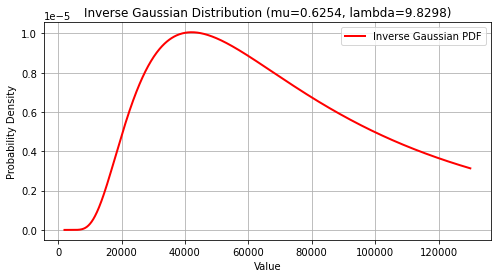

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgauss

mu = 0.6254     # 均值参数
lambda_param = 9.8298  # 形状参数
factor=2*L**(-3/2)

inv_gauss = invgauss(mu=mu, scale=lambda_param)

# 生成x轴的值，需要足够的范围来展示分布
#x_min = invgauss.ppf(0.01, mu, scale=lambda_param)
#x_max = invgauss.ppf(0.99, mu, scale=lambda_param)
x = np.linspace(2000, 130000, 1000)

# 计算PDF
pdf = factor*inv_gauss.pdf(factor*x)

# 绘制PDF图像
plt.figure(figsize=(8, 4))
plt.plot(x, pdf, 'r-', lw=2, label='Inverse Gaussian PDF')
plt.title('Inverse Gaussian Distribution (mu=0.6254, lambda=9.8298)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()


1000

In [164]:
np.min(q_A)
np.max(q_A)

-0.008456000000000019

0.488004

Text(0.5, 1.0, 'Probability Density Function')

Text(0.5, 0, 'average flow')

Text(0, 0.5, 'Density')

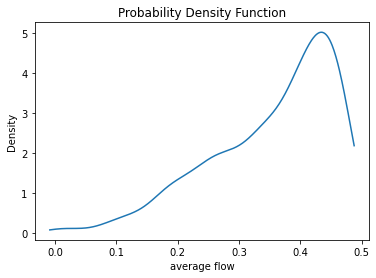

<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Inverse Gaussian Distribution (mu=0.6254, lambda=9.8298)')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Probability Density')

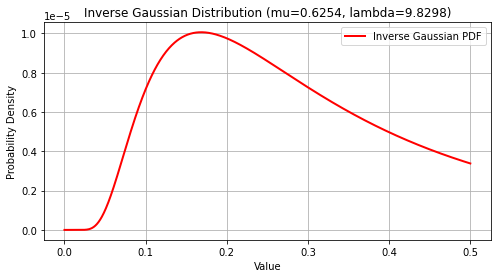

In [169]:
p = np.linspace(0, 0.5, 1000)
flow_factor=(1/2)*L**(1/2) 

# 计算PDF
flow_pdf = factor*inv_gauss.pdf(flow_factor*p) 

# 绘制PDF图像 
plt.figure(figsize=(8, 4))
plt.plot(p, flow_pdf, 'r-', lw=2, label='Inverse Gaussian PDF') 
plt.title('Inverse Gaussian Distribution (mu=0.6254, lambda=9.8298)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend(loc='best')
plt.grid(True)
plt.show()

(0.0, 1.0)

Text(0.5, 1.0, 'Inverse Gaussian Distribution')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Probability Density')

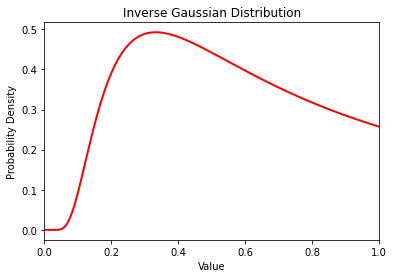

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import invgauss

# 反高斯分布的参数
mu = 0.625416   # 均值参数
shape = 9.82985 # 形状参数
invgauss()
# 创建反高斯分布对象
inv_gauss = invgauss(mu=shape/mu)
# 生成x轴的值，限制在0到1之间
x = np.linspace(0, 1, 1000)
# 计算PDF
pdf = inv_gauss.pdf(x)

# 绘制PDF，限制x轴在0到1之间
plt.plot(x, pdf, 'r-', lw=2)
plt.xlim(0, 1)  # 设置x轴的范围为0到1
plt.title('Inverse Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.show()


<ipython-input-106-def73c6e2161>:13: RuntimeWarning: divide by zero encountered in true_divide
  coeff = np.sqrt(lambda_param / (2 * np.pi * x**3))
<ipython-input-106-def73c6e2161>:14: RuntimeWarning: divide by zero encountered in true_divide
  exp_part = np.exp(-lambda_param * ((x - mu)**2) / (2 * mu**2 * x))
<ipython-input-106-def73c6e2161>:15: RuntimeWarning: invalid value encountered in multiply
  return coeff * exp_part


<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, 'Inverse Gaussian Distribution')

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Probability Density')

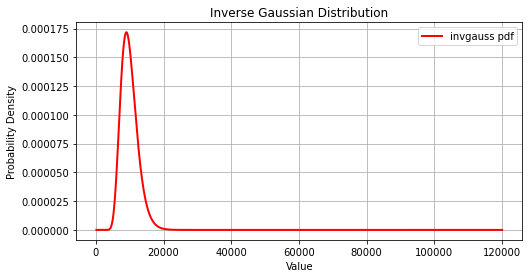

(array(0.625416), array(0.24462845))

[11514,
 33873,
 21581,
 47182,
 15476,
 6072,
 8050,
 8482,
 49617,
 81201,
 82851,
 30902,
 59361,
 18230,
 12407,
 41221,
 16242,
 24122,
 44687,
 49321,
 3993,
 22928,
 9712,
 70028,
 14061,
 14583,
 32670,
 13909,
 53920,
 5012,
 15152,
 68449,
 26514,
 23132,
 15086,
 10132,
 39226,
 26084,
 64145,
 16109,
 33635,
 21024,
 43430,
 82406,
 16391,
 77777,
 56813,
 15582,
 50027,
 74416,
 20499,
 82579,
 18579,
 44376,
 102975,
 15599,
 63018,
 25045,
 12243,
 85784,
 9029,
 10349,
 49699,
 8127,
 8116,
 3936,
 26179,
 23672,
 95289,
 38817,
 12378,
 15957,
 38074,
 100390,
 6415,
 27303,
 29735,
 60663,
 10985,
 44107,
 5885,
 9856,
 13193,
 39189,
 101478,
 4289,
 7946,
 7148,
 15383,
 21871,
 11395,
 6345,
 27416,
 39723,
 21125,
 31593,
 22168,
 11905,
 30979,
 8686,
 35151,
 50956,
 40958,
 34212,
 21910,
 97998,
 48830,
 16031,
 81366,
 15813,
 80996,
 15345,
 29474,
 24459,
 44955,
 15427,
 29426,
 18263,
 73630,
 6954,
 43263,
 12938,
 57061,
 6007,
 33302,
 16430,
 82468,
 

In [131]:
factor 

6.324555320336759e-05

In [106]:
import numpy as np

# Define the inverse Gaussian PDF function according to the given formula
def pdf_IG(x, mu=0.625416, lambda_param=9.8298):
    """
    Compute the probability density function of the Inverse Gaussian distribution.
    
    :param x: The value(s) at which to evaluate the PDF. Must be positive.
    :param mu: The mean parameter of the distribution. Must be positive.
    :param lambda_param: The shape parameter of the distribution. Must be positive.
    :return: The probability density at x.
    """
    coeff = np.sqrt(lambda_param / (2 * np.pi * x**3))
    exp_part = np.exp(-lambda_param * ((x - mu)**2) / (2 * mu**2 * x))
    return coeff * exp_part

# Example usage:
# Calculate the PDF at x = 1
pdf_at_1 = pdf_IG(1)
print(pdf_at_1)


0.21452650592302933


In [127]:
invgauss.pdf(1, mu) 

0.3334372629080458

In [101]:
invgauss.pdf()

0.625416

In [115]:
lambda_param 

9.8298

In [93]:
np.sqrt(0.625**3/9.829)

0.15760331875959033

Text(0.5, 1.0, 'PDF of A')

Text(0.5, 0, 'A')

Text(0, 0.5, 'Probability Density')

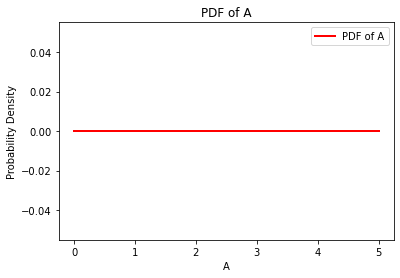

In [77]:
from scipy.stats import invgauss

# 反高斯分布的参数
mu = 0.625416
shape = 9.82985
scale = 2 * 1000**(-3/2)

# 创建反高斯分布对象
inv_gauss = invgauss(mu=shape/mu)

# 设定 A 的范围（这里假设 A 的取值范围为0到5）
a_values = np.linspace(0, 5, 1000)

# 计算 Z 对应的值
z_values = scale * a_values

# 计算 Z 的 PDF
z_pdf = inv_gauss.pdf(z_values)

# 由于变量变换，我们需要乘以 |dz/da| 的绝对值
dz_da = scale
a_pdf = z_pdf * dz_da

# 绘制 A 的 PDF
plt.plot(a_values, a_pdf, 'r-', lw=2, label='PDF of A')

# 添加标签和图例
plt.title('PDF of A')
plt.xlabel('A')
plt.ylabel('Probability Density')
plt.legend()

# 显示图表
plt.show()

In [76]:
np.linspace(0, 1, 1000)
factor 
2*L**(-3/2)
L 

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

6.324555320336759e-05

6.324555320336759e-05

1000

In [46]:
jam_size_counter

int(max(jam_size_counter.keys()))

Counter({3: 1,
         15: 1,
         2: 9,
         10: 3,
         23: 1,
         28: 1,
         32: 1,
         13: 1,
         43: 1,
         49: 1,
         81: 2,
         135: 1,
         6: 3,
         20: 1,
         33: 1,
         61: 1,
         140: 1,
         145: 1,
         212: 1,
         239: 1,
         264: 1,
         344: 1,
         355: 1,
         427: 1,
         182: 1,
         188: 2,
         194: 1,
         200: 1,
         4: 2,
         8: 4,
         12: 1,
         5: 3,
         24: 2,
         30: 1,
         55: 2,
         79: 1,
         141: 1,
         154: 1,
         220: 1,
         233: 1,
         285: 1,
         308: 1,
         374: 2,
         435: 1,
         371: 1,
         487: 1,
         333: 1,
         351: 1,
         357: 1,
         482: 1,
         468: 2,
         560: 1,
         525: 1,
         533: 1,
         539: 1,
         566: 1,
         713: 1,
         774: 1,
         773: 1,
         810: 1,
         

810

In [29]:
plt.figure(figsize=(12,6))
plt.loglog(x, y, marker='o')
plt.title("Log-Log Plot Example")
plt.xlabel("X axis")
plt.ylabel("Y axis")

# 显示图表
plt.show()

46847

250000.0

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Jam Lifespans')

Text(0.5, 0, 'Jam lifespan')

Text(0, 0.5, 'Number of jams')

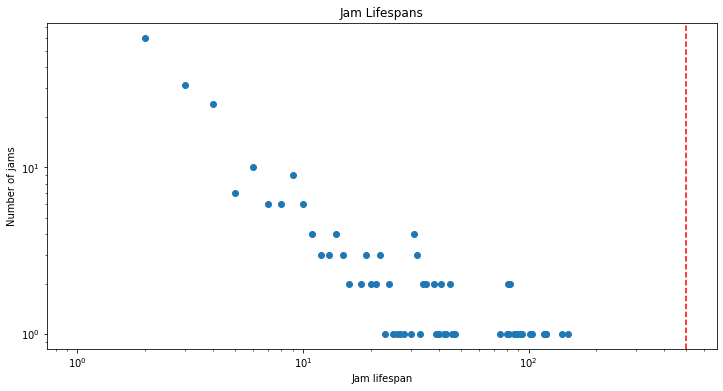

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Jam Sizes')

Text(0.5, 0, 'Jam size')

Text(0, 0.5, 'Number of jams')

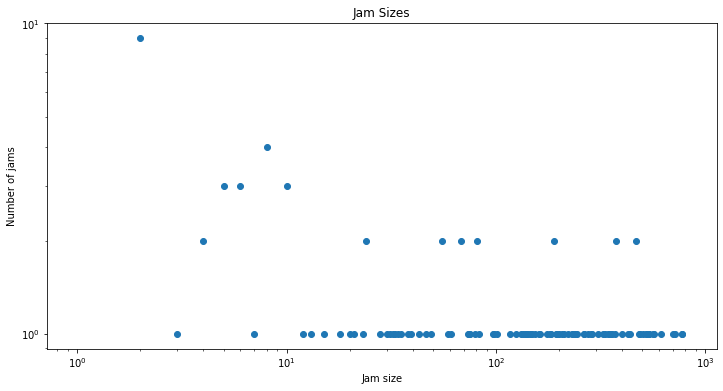

In [50]:
plt.figure(figsize=(12,6))
plt.title(f'Jam Lifespans')
plt.loglog(range(1, int(max(lifespan_counter.keys()))), [lifespan_counter[i] for i in range(1, int(max(lifespan_counter.keys())))], 'o')
plt.xlabel('Jam lifespan')
plt.ylabel('Number of jams')

# Add a vertical line at T
plt.axvline(x=T, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes') 
plt.loglog(range(1, int(max(jam_size_counter.keys()))), [jam_size_counter[i] for i in range(1, int(max(jam_size_counter.keys())))], 'o')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.show()